In [2]:
import numpy as np
from sklearn.datasets import fetch_openml

In [4]:
X, y = fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    data_home="./datasets/mnist",
    as_frame=False,
    cache=True,
)
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
import matplotlib.pyplot as plt


def plot_digit(digit):
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap="binary")
    plt.axis("off")

(None, '5')

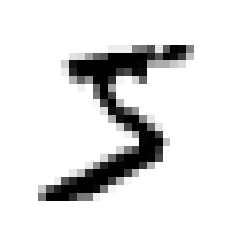

In [6]:
plot_digit(X[0]), y[0]

In [7]:
y = y.astype(np.uint)

In [8]:
y[0]

5

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [33]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [34]:
%%time

y_pred = pipe.predict(X_test)

In [35]:
%%time

pipe.score(X_test, y_test)

0.9475

In [37]:
sum(y_pred == y_test) / len(y_test)

0.9475

In [23]:
pipe.named_steps

{'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=10)}

In [38]:
import math

from sklearn.model_selection import GridSearchCV

pipe_params = {
    "kneighborsclassifier__n_neighbors": [3, 4, 5, 10],
    "kneighborsclassifier__p": [1, 2],
}

cv = GridSearchCV(pipe, pipe_params, n_jobs=-1, cv=3)
cv

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [3, 4, 5, 10],
                         'kneighborsclassifier__p': [1, 2]})

In [39]:
%%time

cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
cv.cv_results_

In [ ]:
cv.best_params_

In [ ]:
cv.best_scores_